<a href="https://colab.research.google.com/github/rubel-47/Projects/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Change run time type and select GPU mode

!pip install face-recognition

In [ ]:
 from face_recognition.api import face_encodings

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install opencv-python==4.5.5.62
# !pip install -U opencv-python

In [ ]:
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [ ]:
print(face_recognition.__version__)
print(cv2.__version__)
print(np.__version__)

1.2.3
4.5.5
1.21.5


In [ ]:
path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/train_img/rita.jpg"

unknown_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/unknownRita.jpg"

known_image = face_recognition.load_image_file(file=path)

my_face_encoding = face_recognition.face_encodings(face_image=known_image)[0]


unknown_image = face_recognition.load_image_file(file=unknown_path)

unknown_face_encoding = face_recognition.face_encodings(face_image=unknown_image)[0]


In [ ]:
results = face_recognition.compare_faces(known_face_encodings=[my_face_encoding], 
                                         face_encoding_to_check=unknown_face_encoding)

In [ ]:
results

[True]

In [ ]:
if results[0] == True:
    print("This is Rita")
else:
    print("This is not Rita")

This is Rita


In [ ]:
path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/train_img"

images = []

classnames = []

myList = os.listdir(path=path)


In [ ]:
print(myList)

['alamin.jpg', 'rita.jpg', 'taneem.jpg']


In [ ]:
for img in myList:
    currentImg = cv2.imread(filename=f"{path}/{img}")
    images.append(currentImg)
    classnames.append(os.path.splitext(img)[0])

print(classnames)

['alamin', 'rita', 'taneem']


In [ ]:
def findEncodings(images):
    encodeList = []

    for img in images:
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(face_image=img)[0]
        encodeList.append(encode)
    return encodeList

This is encodeListKnown:  [array([-0.09472609,  0.07074271,  0.03453757, -0.03762094, -0.09284283,
        0.06431137, -0.08423272, -0.03967588,  0.26345235, -0.12151581,
        0.17173342,  0.04960784, -0.10450961, -0.05518207, -0.04449336,
        0.11291304, -0.14274481, -0.10548706,  0.03092741, -0.12213418,
       -0.0837854 ,  0.03965153,  0.04463616,  0.0189691 , -0.18799867,
       -0.34780449, -0.06775726, -0.16140868,  0.02339576, -0.07509884,
       -0.04293011,  0.1311149 , -0.19022454, -0.04075436,  0.03793681,
        0.14074978,  0.0023656 ,  0.06804791,  0.14762764,  0.0597037 ,
       -0.10182463,  0.01939127,  0.03826725,  0.28153709,  0.11023887,
        0.07393477,  0.01852983, -0.08141926,  0.09523466, -0.17358944,
        0.11710406,  0.07633874,  0.08596176,  0.01163612,  0.08204228,
       -0.1435775 ,  0.00458189,  0.03852631, -0.14344268,  0.10294722,
        0.0263107 , -0.0004338 , -0.08264602,  0.03252655,  0.28698421,
        0.15003236, -0.0720827 , -0.1

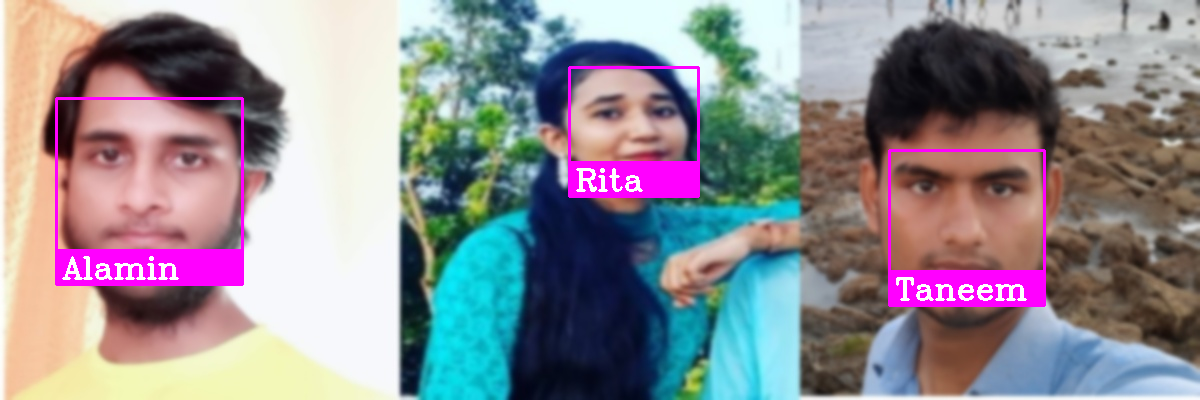

In [ ]:
# from face_recognition.api import face_encodings

encodeListKnown = findEncodings(images)

print("This is encodeListKnown: ", encodeListKnown)
print("*"*60)

# path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/all_img.jpg"
path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/Images/all_img_blur.jpg"
unknown_face = cv2.imread(filename=path)

unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)


facesCurFrame = face_recognition.face_locations(img=unknown_face_RGB)
print("facesCurFrame",facesCurFrame)
print("*"*60)
encodesCurFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurFrame)
print("encodesCurFrame",encodesCurFrame)
print("*"*60)
name = ""
for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
    matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodeFace)

    print("faceLoc: ",faceLoc)
    print("*"*60)

    print("matches: ",matches)
    print("*"*60)
    faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodeFace)
    
    matchIndex = np.argmin(faceDistance)
    print("matchIndex",matchIndex)
    print("*"*60)

    if matches[matchIndex]:
        name = classnames[matchIndex].capitalize()
        print("Name: ", name)
        print("*"*60)

        y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

        # y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4

        cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
        cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
        cv2.putText(img=unknown_face, text=name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                    fontScale=1, color=(255,255,255), thickness=2)

    # y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

    # print(f"y1:{y1}, x2:{x2}, y2:{y2}, x1:{x1}") # y1:63, x2:162, y2:138, x1:88

    # # y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4

    # cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
    # # cv2.rectangle(img=unknown_face,pt1=(80, 50), pt2=(150, 150), color=(0,255,255), thickness=2)
    # cv2.rectangle(img=unknown_face,pt1=(x1, y2), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
    # cv2.putText(img=unknown_face, text=name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
    #             fontScale=1, color=(255,255,255), thickness=2)
        

# cv2.imshow("Image", unknown_face)
cv2_imshow(unknown_face)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
cascade_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/haarcascade_frontalface_default.xml"

cascade_obj = cv2.CascadeClassifier(cascade_path)

In [ ]:
# initialize the Haar Cascade face detection model
# face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# !pip install openpyxl

In [ ]:
import openpyxl
import datetime

In [ ]:
xlsx_path = "/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN/attendence.xlsx"

def takeAttendance(numFace):
    wb = openpyxl.load_workbook(filename=xlsx_path)
    sheet = wb.active
    attend_date, attend_time = str(datetime.datetime.now()).split()




In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image

    # img = js_to_image(js_reply["img"])

    unknown_face = js_to_image(js_reply["img"])
    # print("Unknown Face shape: ",unknown_face.shape)
    # print("Unknown Face ndim: ",unknown_face.ndim)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # print("bbox_array shape: ",bbox_array.shape)
    # print("bbox_array ndim: ",bbox_array.ndim)
    # print(bbox_array)

    # grayscale image for face detection
    # gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    unknown_face_RGB = cv2.cvtColor(src=unknown_face, code=cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(img=unknown_face_RGB)
    # print("facesCurFrame",facesCurFrame)
    # print("*"*60)
    encodesCurFrame = face_recognition.face_encodings(face_image=unknown_face_RGB, known_face_locations=facesCurFrame)
    # print("encodesCurFrame",encodesCurFrame)
    # print("*"*60)
    name = ""

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(known_face_encodings=encodeListKnown, face_encoding_to_check=encodeFace)

        # print("faceLoc: ",faceLoc)
        # print("*"*60)

        # print("matches: ",matches)
        # print("*"*60)
        faceDistance = face_recognition.face_distance(face_encodings=encodeListKnown, face_to_compare=encodeFace)
        
        matchIndex = np.argmin(faceDistance)
        # print("matchIndex",matchIndex)
        # print("*"*60)

        # for (x,y,w,h) in faces:
        #   bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

        # bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
        # # convert overlay of bbox into bytes

        # bbox_bytes = bbox_to_bytes(bbox_array)

        # # update bbox so next frame gets new overlay

        # bbox = bbox_bytes

        if matches[matchIndex]:
            name = classnames[matchIndex].capitalize()
            # print("Name: ", name)
            # print("*"*60)

            y1, x2, y2, x1 = faceLoc # faceLoc:  (63, 162, 138, 88)

            # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
            bbox_array = cv2.rectangle(img=bbox_array,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)

            cv2.rectangle(img=unknown_face,pt1=(x1, y1), pt2=(x2, y2), color=(255,0,255), thickness=2)
            cv2.rectangle(img=unknown_face,pt1=(x1, y2-35), pt2=(x2, y2), color=(255,0,255), thickness=cv2.FILLED)
            cv2.putText(img=unknown_face, text=name, org=(x1+6, y2-6), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                        fontScale=1, color=(255,255,255), thickness=2)
            
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    # print(bbox_bytes)
    bbox = bbox_bytes

    cv2_imshow(unknown_face)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()